## <i><u> P1: Streamfunction and volume flux in a source-sink couple </u></i>


In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Define grid parameters

N = 100
Xmin = -4.0; Xmax = 4.0
Ymin = -4.0; Ymax = 4.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

In [3]:
#Define flow parameters

sigma_source = 2.0;               #Source strength
x_source, y_source = -2.0, 0.0

sigma_sink = -2.0;               #Sink strength
x_sink, y_sink = 2.0, 0.0

u_source = sigma_source/(2.*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
v_source = sigma_source/(2.*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)

u_sink = sigma_sink/(2.*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2)
v_sink = sigma_sink/(2.*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2)

xvelo = u_source + u_sink
yvelo = v_source + v_sink
Velocity = numpy.sqrt(u_source**2 + v_source**2) + numpy.sqrt(u_sink**2 + v_sink**2)

In [4]:
theta1 = numpy.zeros_like(X)
theta2 = numpy.zeros_like(X)
for i in range (N):
    for j in range (N):
        theta1[i,j] = math.atan2((Y[i,j]-y_source),(X[i,j]-x_source))
        theta2[i,j] = math.atan2((Y[i,j]-y_sink),(X[i,j]-x_sink))
    
psi = 1.0/(2.0*math.pi)*(sigma_source*theta1 + sigma_sink*theta2)

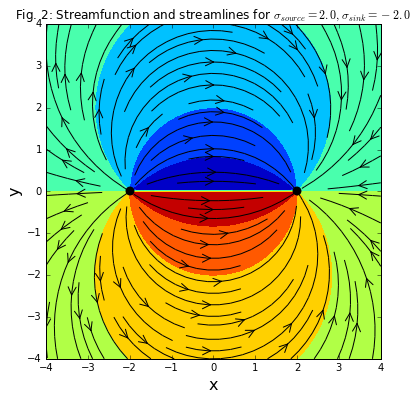

In [5]:
pyplot.figure(figsize=(6, 6))

pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,psi)
pyplot.streamplot(X, Y, xvelo, yvelo, density=1, linewidth=1, color='#000000', arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#000000', s=80, marker='o', linewidth=0);
pyplot.title('Fig. 2: Streamfunction and streamlines for $\sigma_{source} = 2.0, \sigma_{sink} = -2.0 $')

In [6]:
integral1 = 0.0; integral2 = 0.0
jmin = 0; jmax = 0

for j in range (N-1):
    if ((Y[j,-1] >= -2.0) & (Y[j+1,-1] <= 2.0)):
        integral1 = integral1 + 0.5*(xvelo[j,-1]+xvelo[j+1,-1])*dy
        if (jmin == 0):
            jmin = j; jmax = j
        jmax = jmax + 1
        
    if ((Y[j,0] >= -2.0) & (Y[j+1,0] <= 2.0)):
        integral2 = integral2 + 0.25*(xvelo[j,49]+xvelo[j+1,49]+xvelo[j,50]+xvelo[j+1,50])*dy
        
#Integral and streamfunction difference at x = 4.0
print('Volume flux integral at x = 4.0 between (y = -2.0 and y = 2.0):',integral1)
print('Difference of streamfunction at x = 4.0 between (y = -2.0 and y = 2.0):',psi[jmax,-1]-psi[jmin,-1])

print('')

#Integral and streamfunction difference at x = -4.0
print('Volume flux integral at x = 0.0 between (y = -2.0 and y = 2.0):',integral2)
print('Difference of streamfunction at x = 0.0 between (y = -2.0 and y = 2.0):', 0.5*((psi[jmax,49]-psi[jmin,49])+ \
                                                                                     (psi[jmax,50]-psi[jmin,50])) )

Volume flux integral at x = 4.0 between (y = -2.0 and y = 2.0): -0.293828210392
Difference of streamfunction at x = 4.0 between (y = -2.0 and y = 2.0): -0.293866786118

Volume flux integral at x = 0.0 between (y = -2.0 and y = 2.0): 0.993580650087
Difference of streamfunction at x = 0.0 between (y = -2.0 and y = 2.0): -1.00633186789


The volume fluxes computed as a line integral and as the difference in the bounding streamfunctions agree well when computed at $x = 4.0$. However, there is a significant error in the two values, computed at $x = 0.0$. To understand why this occurs, let's look plots of streamfunction in those two sections.

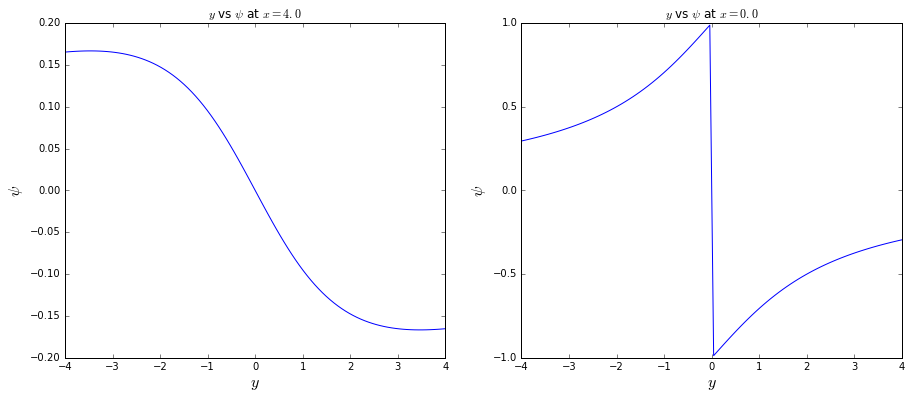

In [7]:
pyplot.figure(figsize=(15, 6))

pyplot.subplot(121)
pyplot.plot(Y[:,-1], psi[:,-1])
pyplot.xlabel('$y$', fontsize=16)
pyplot.ylabel('$\psi$', fontsize=16)
pyplot.title('$y$ vs $\psi$ at $x = 4.0$')

pyplot.subplot(122)
pyplot.plot(Y[:,49], psi[:,49])
pyplot.xlabel('$y$', fontsize=16)
pyplot.ylabel('$\psi$', fontsize=16)
pyplot.title('$y$ vs $\psi$ at $x = 0.0$')

In the plots shown above, the distribution of streamfunction along $y$ at $x = 4.0$ is smooth, whereas that at $x = 0.0$ has a discontinuity at $y = 0.0$. The line integral does not account for this discontinuity, resulting in a discrepancy in the values of volume flux computed using the two methods. The values obtained using the two methods differ in magnitude by a value of $2.0$, which is equal to the length of the jump in $\psi$.

<hr>

## <i><u> P2: Derivation of dividing streamline for Rankine Half-body </u></i>

<p>
Consider a source of strength $\sigma $, placed in uniform flow of velocity $u_{\infty} $.

The streamfunctions for each of these flows can be described, in polar coordinates as:

$$\psi_{uniform} = u_{\infty}r\sin\theta $$
$$\psi_{source} = \frac{\sigma}{2\pi}\theta $$



Here, the angle $\theta$ is measured about the origin placed at $\left( x_{source}, y_{source} \right)$. The resulting flow has the combined streamfunction:

$$\psi= \psi_{uniform} + \psi_{source}$$

$$\psi= u_{\infty}r\sin\theta + \frac{\sigma}{2\pi}\theta $$



The dividing streamlines can be found by computing the streamfunction at the stagnation point. For the upper dividing streamline, set $\theta  = \pi$

$$\psi_{1} = u_{\infty}r\sin\pi + \frac{\sigma}{2\pi}\pi $$

Thus the equation for the upper dividing streamline is:

$$\psi_{1} = \frac{\sigma}{2}$$

Likewise, for the lower streamline, we can set $\theta  = -\pi$.

$$ \psi_{2} = -\frac{\sigma}{2} $$

Hence, the equation for the dividing streamlines for a source in uniform flow is:

$$\psi = \pm \frac{\sigma}{2}$$


<hr>

## <i><u> P3: Dimensions of Rankine oval </u></i>

### <i> Half-length of Rankine oval </i>

Consider a Rankine oval formed by a source-sink pair of equal strength $\sigma$, placed in a uniform flow $u_{\infty}$. Let the source and sink, each be $d_{0}$ on either side of the origin. The streamfunction of the combined flow, in Cartesian coordinates, can be expressed as:

\begin{equation}
 \psi = u_{\infty} y + \frac{\sigma}{2\pi} \arctan \left ( 
                     \frac{2 y d_{0}}{x^{2} + y^{2} - d_{0}^{2}} \right ) 
\end{equation}


By setting $ \psi = 0 $, we can obtain the condition for the stagnation streamline. To find the half-length, $L$, consider $ y \ll 1 $. This means the angles $\theta_{1}$ and $\theta_{2}$, measured about the locations of the source and sink ~ $0$.

\begin{equation}
 0 = u_{\infty} y - \frac{\sigma}{2\pi} \arctan \left ( 
                     \frac{2 y d_{0}}{x^{2} + y^{2} - d_{0}^{2}} \right ) 
\end{equation}


\begin{equation}
 \Rightarrow  u_{\infty} y = \frac{\sigma}{2\pi} \arctan \left ( 
                     \frac{2 y d_{0}}{x^{2} + y^{2} - d_{0}^{2}} \right ) 
\end{equation}


At very small angles $\delta \theta$, $\tan (\delta \theta) = \delta \theta$

\begin{equation}
 \Rightarrow  u_{\infty} y \approx \frac{\sigma}{2\pi} \left ( 
                     \frac{2 y d_{0}}{x^{2} + y^{2} - d_{0}^{2}} \right ) 
\end{equation}


\begin{equation}
 \Rightarrow  u_{\infty} y \approx \frac{\sigma}{2\pi} \left ( 
                     \frac{2 y d_{0}}{L^{2} - d_{0}^{2}} \right ) 
\end{equation}


\begin{equation}
 \Rightarrow  \frac{L}{d_{0}} \approx \sqrt[]{ 1 + \frac{\sigma}{2\pi} 
                 \left( \frac{2}{u_{\infty}d_{0}} \right)}
\end{equation}

Rewriting $d = 2d_{0}$:

\begin{equation}
 \Rightarrow  \frac{2L}{d} \approx \sqrt[]{ 1 + \frac{\sigma}{2\pi} 
                 \left( \frac{4}{u_{\infty}d} \right)}
\end{equation}

\begin{equation}
 \Rightarrow  L \approx \frac{d}{2} \sqrt[]{ 1 + \frac{\sigma}{2\pi} 
                 \left( \frac{4}{u_{\infty}d} \right)}
\end{equation}

### <i> Half-width of Rankine oval </i>


Likewise, the half-width $H$ of the Rankine oval can be calculated by setting $x = 0$ in the equation:

\begin{equation}
 u_{\infty} y = \frac{\sigma}{2\pi} \arctan \left ( 
                     \frac{2 y d_{0}}{x^{2} + y^{2} - d_{0}^{2}} \right ) 
\end{equation}

\begin{equation}
 \Rightarrow \tan \left( \frac{2 \pi u_{\infty} H}{\sigma} \right) =
                     \frac{2 H d_{0}}{H^{2} - d_{0}^{2}}
\end{equation}

\begin{equation}
 \Rightarrow  \frac{H}{d_{0}} \approx \frac{1}{2} \left[ \left( \frac{H}{d_{0}} \right)^{2} - 1 \right] \tan \left[  \left(  \frac{2 \pi u_{\infty} d_{0}}{\sigma} \right) \frac{H}{d_{0}} \right]
\end{equation}

The above equation cannot be trivially solved. Hence to obtain a solution, the following expression is tested for local minima on the $x = 0$ line.

\begin{equation}
 \frac{H}{d_{0}} - \frac{1}{2} \left[ \left( \frac{H}{d_{0}} \right)^{2} - 1 \right] \tan \left[  \left(  \frac{2 \pi u_{\infty} d_{0}}{\sigma} \right) \frac{H}{d_{0}} \right] \rightarrow 0

\end{equation}

<hr>

### <u>Case 1</u> :  $\sigma_{source} = 2.0$ , $\sigma_{sink} = -2.0$ , $u_{\infty} = 0.5 $

Let's now plot the Rankine oval defiend by the above parameters and calculate its half-width and half-length.

In [8]:
#Define flow parameters

uinf = 0.5 #Uniform velocity

sigma_source = 2.0;               #Source strength
x_source, y_source = -2.0, 0.0

sigma_sink = -2.0;               #Sink strength
x_sink, y_sink = 2.0, 0.0

u_source = sigma_source/(2.*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
v_source = sigma_source/(2.*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)

u_sink = sigma_sink/(2.*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2)
v_sink = sigma_sink/(2.*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2)

xvelo = u_source + u_sink + uinf
yvelo = v_source + v_sink
Velocity = numpy.sqrt(xvelo**2 + yvelo**2)

In [9]:
theta1 = numpy.zeros_like(X)
theta2 = numpy.zeros_like(X)
for i in range (N):
    for j in range (N):
        theta1[i,j] = math.atan2((Y[i,j]-y_source),(X[i,j]-x_source))
        theta2[i,j] = math.atan2((Y[i,j]-y_sink),(X[i,j]-x_sink))
    
psi = 1.0/(2.0*math.pi)*(sigma_source*theta1 + sigma_sink*theta2) + uinf*Y

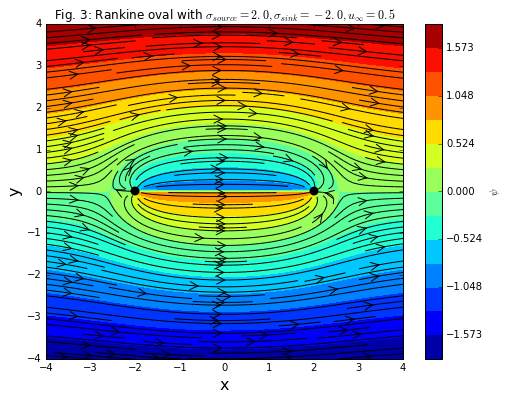

In [10]:
pyplot.figure(figsize=(8, 6))

pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,psi, levels = numpy.linspace(numpy.min(psi), numpy.max(psi), 15))
pyplot.colorbar(label = '$\psi$')
pyplot.streamplot(X, Y, xvelo, yvelo, density=2, linewidth=1, color='#000000', arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#000000', s=80, marker='o', linewidth=0);
pyplot.title('Fig. 3: Rankine oval with $\sigma_{source} = 2.0, \sigma_{sink} = -2.0, u_{\infty} = 0.5 $')

In [11]:
#Code to find left stagnation point:
d0 = x_sink

ind_mid = int(N/2) - 1
j_zero = numpy.argmin(abs(psi[ind_mid,:])) #For half-length
i_zero = numpy.argmin(abs(psi[:,ind_mid])) #For half-width

L_RO = d0*numpy.sqrt( 1.0 + sigma_source/(2.0*numpy.pi)*(2/uinf/d0) )

diff = 1.0E10; test = 0.1
for i in range (N):
    H = Y[i,ind_mid]
    ratio = H/d0
    temp = ratio - 0.5*(ratio**2-1)*math.tan((2.0*math.pi*uinf*d0/sigma_source*ratio))
    if (abs(abs(temp) - test) <= diff):
        diff = abs(abs(temp) - test);
        iHloc = i;
        
H_RO = abs(Y[iHloc,ind_mid])
    
print('Half length by checking where psi = 0 on X-axis', X[ind_mid,j_zero], ' units' )
print('Half length using derived formula', L_RO, ' units')
print('')
print('Half width by checking where psi = 0 on Y-axis', Y[i_zero,ind_mid], ' units' )
print('Half width using derived formula', H_RO, ' units')

Half length by checking where psi = 0 on X-axis 2.54545454545  units
Half length using derived formula 2.55860881916  units

Half width by checking where psi = 0 on Y-axis 1.25252525253  units
Half width using derived formula 1.25252525253  units


<hr>

Thus, the half-length and half-width of the Rankine oval were computed to a good degree of agreement. Let's compute the same for the following additional cases:

### <u>Case 2</u> :  $\sigma_{source} = 2.0$ , $\sigma_{sink} = -2.0$ , $u_{\infty} = 1.0 $


In [12]:
#Define flow parameters

uinf = 1.0 #Uniform velocity

sigma_source = 2.0;               #Source strength
x_source, y_source = -2.0, 0.0

sigma_sink = -2.0;               #Sink strength
x_sink, y_sink = 2.0, 0.0

u_source = sigma_source/(2.*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
v_source = sigma_source/(2.*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)

u_sink = sigma_sink/(2.*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2)
v_sink = sigma_sink/(2.*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2)

xvelo = u_source + u_sink + uinf
yvelo = v_source + v_sink
Velocity = numpy.sqrt(xvelo**2 + yvelo**2)

theta1 = numpy.zeros_like(X)
theta2 = numpy.zeros_like(X)
for i in range (N):
    for j in range (N):
        theta1[i,j] = math.atan2((Y[i,j]-y_source),(X[i,j]-x_source))
        theta2[i,j] = math.atan2((Y[i,j]-y_sink),(X[i,j]-x_sink))
    
psi = 1.0/(2.0*math.pi)*(sigma_source*theta1 + sigma_sink*theta2) + uinf*Y


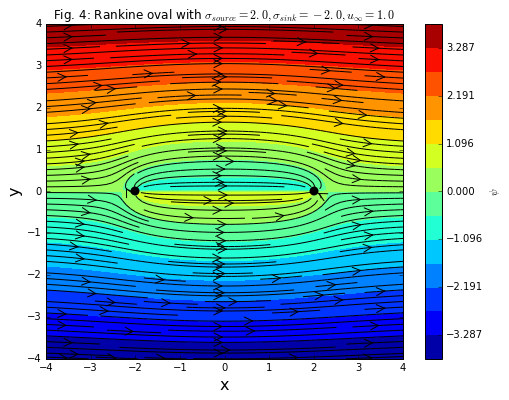

In [13]:
pyplot.figure(figsize=(8, 6))

pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,psi, levels = numpy.linspace(numpy.min(psi), numpy.max(psi), 15))
pyplot.colorbar(label = '$\psi$')
pyplot.streamplot(X, Y, xvelo, yvelo, density=2, linewidth=1, color='#000000', arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#000000', s=80, marker='o', linewidth=0);
pyplot.title('Fig. 4: Rankine oval with $\sigma_{source} = 2.0, \sigma_{sink} = -2.0, u_{\infty} = 1.0 $')

In [14]:
#Code to find left stagnation point:
d0 = x_sink

ind_mid = int(N/2) - 1
j_zero = numpy.argmin(abs(psi[ind_mid,:])) #For half-length
i_zero = numpy.argmin(abs(psi[:,ind_mid])) #For half-width

L_RO = d0*numpy.sqrt( 1.0 + sigma_source/(2.0*numpy.pi)*(2/uinf/d0) )

diff = 1.0E10; test = 0.0
for i in range (N):
    if ((i != 49) and (i != 50)): #Exclude two points closest to Y = 0.0
        H = Y[i,ind_mid]
        ratio = H/d0
        temp = ratio - 0.5*(ratio**2-1)*math.tan((2.0*math.pi*uinf*d0/sigma_source*ratio))
        if (abs(abs(temp) - test) <= diff):
            diff = abs(abs(temp) - test);
            iHloc = i;
        
H_RO = abs(Y[iHloc,ind_mid])
    
print('Half length by checking where psi = 0 on X-axis', abs(X[ind_mid,j_zero]), ' units' )
print('Half length using derived formula', L_RO, ' units')
print('')
print('Half width by checking where psi = 0 on Y-axis', abs(Y[i_zero,ind_mid]), ' units' )
print('Half width using derived formula', H_RO, ' units')

Half length by checking where psi = 0 on X-axis 2.30303030303  units
Half length using derived formula 2.29635353218  units

Half width by checking where psi = 0 on Y-axis 0.767676767677  units
Half width using derived formula 0.767676767677  units


<hr>

### <u>Case 3</u> :  $\sigma_{source} = 1.0$ , $\sigma_{sink} = -1.0$ , $u_{\infty} = 1.0 $


In [15]:
#Define flow parameters

uinf = 1.0 #Uniform velocity

sigma_source = 1.0;               #Source strength
x_source, y_source = -2.0, 0.0

sigma_sink = -1.0;               #Sink strength
x_sink, y_sink = 2.0, 0.0

u_source = sigma_source/(2.*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
v_source = sigma_source/(2.*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)

u_sink = sigma_sink/(2.*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2)
v_sink = sigma_sink/(2.*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2)

xvelo = u_source + u_sink + uinf
yvelo = v_source + v_sink
Velocity = numpy.sqrt(xvelo**2 + yvelo**2)

theta1 = numpy.zeros_like(X)
theta2 = numpy.zeros_like(X)
for i in range (N):
    for j in range (N):
        theta1[i,j] = math.atan2((Y[i,j]-y_source),(X[i,j]-x_source))
        theta2[i,j] = math.atan2((Y[i,j]-y_sink),(X[i,j]-x_sink))
    
psi = 1.0/(2.0*math.pi)*(sigma_source*theta1 + sigma_sink*theta2) + uinf*Y


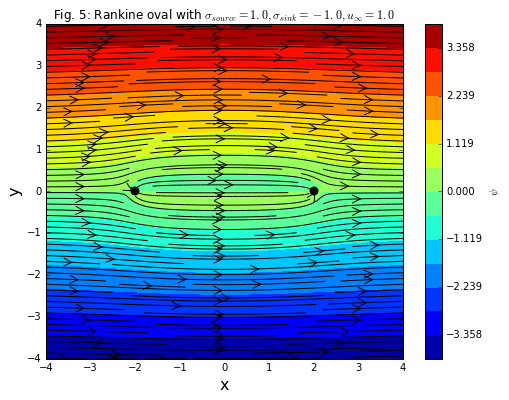

In [16]:
pyplot.figure(figsize=(8, 6))

pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,psi, levels = numpy.linspace(numpy.min(psi), numpy.max(psi), 15))
pyplot.colorbar(label = '$\psi$')
pyplot.streamplot(X, Y, xvelo, yvelo, density=2, linewidth=1, color='#000000', arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#000000', s=80, marker='o', linewidth=0);
pyplot.title('Fig. 5: Rankine oval with $\sigma_{source} = 1.0, \sigma_{sink} = -1.0, u_{\infty} = 1.0 $')

In [17]:

#Code to find left stagnation point:
d0 = x_sink

ind_mid = int(N/2) - 1
j_zero = numpy.argmin(abs(psi[ind_mid,:])) #For half-length
i_zero = numpy.argmin(abs(psi[:,ind_mid])) #For half-width

L_RO = d0*numpy.sqrt( 1.0 + sigma_source/(2.0*numpy.pi)*(2/uinf/d0) )

diff = 1.0E10; test = 0.1
for i in range (N):
    if ((i != 49) and (i != 50)): #Exclude two points closest to Y = 0.0
        H = Y[i,ind_mid]
        ratio = H/d0
        temp = ratio - 0.5*(ratio**2-1)*math.tan((2.0*math.pi*uinf*d0/sigma_source*ratio))
        if (abs(abs(temp) - test) <= diff):
            diff = abs(abs(temp) - test);
            iHloc = i;
        
H_RO = abs(Y[iHloc,ind_mid])
    
print('Half length by checking where psi = 0 on X-axis', abs(X[ind_mid,j_zero]), ' units' )
print('Half length using derived formula', L_RO, ' units')
print('')
print('Half width by checking where psi = 0 on Y-axis', abs(Y[i_zero,ind_mid]), ' units' )
print('Half width using derived formula', H_RO, ' units')

Half length by checking where psi = 0 on X-axis 2.14141414141  units
Half length using derived formula 2.15328116426  units

Half width by checking where psi = 0 on Y-axis 0.444444444444  units
Half width using derived formula 0.444444444444  units


We observe that a good agerement was obtained between the half-lengths and half-widths for the Rankine ovals for each case, using the two approaches.

<hr>

## <i><u> P4: Coefficient of pressure for Rankine half-body </u></i>

In [18]:
#Define grid parameters

N = 100
Xmin = -4.0; Xmax = 4.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

In [19]:
#Define flow parameters

uinf = 1.0 #Uniform velocity

Cp = numpy.zeros_like(X)

sigma_source = 5.0;               #Source strength
x_source, y_source = -1.0, 0.0

u_source = sigma_source/(2.*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
v_source = sigma_source/(2.*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)

xvelo = u_source + uinf
yvelo = v_source 
Velocity = numpy.sqrt(xvelo**2 + yvelo**2)

Cp = 1.0 - (Velocity/uinf)**2

In [20]:
theta1 = numpy.zeros_like(X)

for i in range (N):
    for j in range (N):
        theta1[i,j] = math.atan2((Y[i,j]-y_source),(X[i,j]-x_source))
    
psi = 1.0/(2.0*math.pi)*(sigma_source*theta1) + uinf*Y

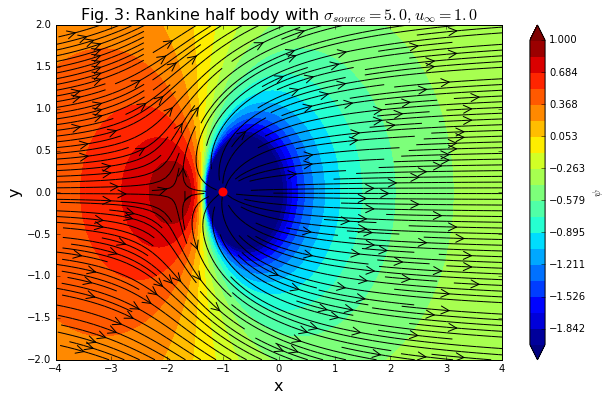

In [21]:
pyplot.figure(figsize=(10, 6))

pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X,Y,Cp, levels = numpy.linspace(-2.0, 1.0, 20), extend='both')
pyplot.colorbar(label = '$\psi$')
pyplot.streamplot(X, Y, xvelo, yvelo, density=2, linewidth=1, color='#000000', arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#FF0000', s=80, marker='o', linewidth=0);
pyplot.title('Fig. 3: Rankine half body with $\sigma_{source} = 5.0, u_{\infty} = 1.0 $', fontsize=16)

The contour plot shown above is divided into two regions: One just upstream of the Rankine half-body and the other which includes the half-body and the flow downstream of the body. $C_{p}$ is largely positive in the first region, while it is negative in the other. The local maximum of $C_{p}$ occurs at the stagnation point, where the local velocity is $0$, and has a value of $1.0$.

<hr>